In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [191]:
data = pd.read_csv('/Users/Mariwa/OneDrive/Documents/tier_dataset bernoulli v2.csv')
X = data.iloc[:,:-1]
Y = data.iloc[:,15]
data.head(300)

,Swimming Pool,Home Type,Residence Type,WiFi,TV,AC,Private Gym,Parking,Wheelchair Accessibility,Pets Allowed,Kids Friendly,Home Workers,Security Guard,Private Garden,Smokers Allowed,Tier
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,5
190,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,5
191,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,5
192,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,5


<AxesSubplot:>

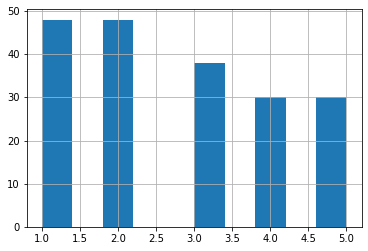

In [193]:
data['Tier'].hist()

<AxesSubplot:>

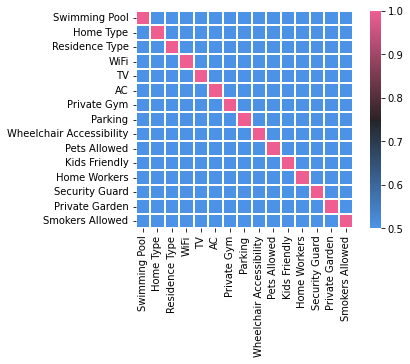

In [194]:
corr = data.iloc[:,:-1].corr(method = 'pearson')
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=.5, cmap=cmap, square=True, linewidths=.2)

In [195]:
X

,Swimming Pool,Home Type,Residence Type,WiFi,TV,AC,Private Gym,Parking,Wheelchair Accessibility,Pets Allowed,Kids Friendly,Home Workers,Security Guard,Private Garden,Smokers Allowed
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
190,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
191,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
192,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


In [203]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
189    5
190    5
191    5
192    5
193    5
Name: Tier, Length: 194, dtype: int64

In [208]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3, random_state=0)

In [209]:
NBModel = BernoulliNB(binarize=True)
NBModel.fit(X_train,Y_train)
print(NBModel)
Y_expect = Y_test
y_predicted = NBModel.predict(X_test)
print (accuracy_score(Y_test, y_predicted)*100)

BernoulliNB(binarize=True)
20.33898305084746


In [189]:
print(metrics.classification_report(Y_test,y_predicted))
print(metrics.confusion_matrix(Y_test,y_predicted))

              precision    recall  f1-score   support

           1       0.23      1.00      0.37        20
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        16

    accuracy                           0.23        88
   macro avg       0.05      0.20      0.07        88
weighted avg       0.05      0.23      0.08        88

[[20  0  0  0  0]
 [15  0  0  0  0]
 [21  0  0  0  0]
 [16  0  0  0  0]
 [16  0  0  0  0]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [177]:
check_value = np.array([1,1,0,1,0,0,1,1,1,0,0,1,1,0,0])

In [178]:
tier_prediction = NBModel.predict([check_value])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


In [179]:
tier_prediction

array([1])